In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kumarshivam8709
Your Kaggle Key: ··········


100%|██████████| 15.1M/15.1M [00:00<00:00, 120MB/s] 

In [4]:
import pandas as pd
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Dense,Dropout,Flatten
import numpy as np
from sklearn.model_selection import train_test_split
import os
from sklearn.preprocessing import OneHotEncoder
from PIL import Image

In [5]:
encoder=OneHotEncoder()
encoder.fit([[0],[1]])

OneHotEncoder()

In [6]:
data = []
paths = []
results = []
for r,d,f in os.walk(r'/content/brain-mri-images-for-brain-tumor-detection/yes'):
  for file in f:
    if '.jpg' in file:
      paths.append(os.path.join(r,file))
for path in paths:
  img=Image.open(path)
  img=img.resize((128,128))
  img=np.array(img)
  if (img.shape==(128,128,3)):
    data.append(np.array(img))
    results.append(encoder.transform([[0]]).toarray())

In [7]:
paths=[]
for r,d,f in os.walk(r'/content/brain-mri-images-for-brain-tumor-detection/no'):
  for file in f:
    if '.jpg' in file:
      paths.append(os.path.join(r,file))
  for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if (img.shape==(128,128,3)):
      data.append(np.array(img))
      results.append(encoder.transform([[1]]).toarray())

In [8]:
data=np.array(data)
data.shape

(139, 128, 128, 3)

In [38]:
results=np.array(results)
results=results.reshape(139,2)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(data,results,test_size=0.2,shuffle='True',random_state=0)

In [50]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='valid',input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='sigmoid'))

In [51]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_18 (Bat  (None, 126, 126, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_19 (Bat  (None, 61, 61, 64)       256       
 chNormalization)                                                
                                                      

In [52]:
y_train.shape

(111, 2)

In [53]:
model.compile(optimizer="rmsprop",loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
history=model.fit(x_train,y_train,epochs=30,batch_size=40,validation_data=(x_test,y_test))

Epoch 1/30
3/3 [==============================] - 2s 145ms/step - loss: 6.9951 - accuracy: 0.6126 - val_loss: 17.7268 - val_accuracy: 0.6429
Epoch 2/30
3/3 [==============================] - 0s 45ms/step - loss: 10.8933 - accuracy: 0.6036 - val_loss: 27.3930 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 0s 44ms/step - loss: 2.1721 - accuracy: 0.7297 - val_loss: 17.1512 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 0s 39ms/step - loss: 2.3303 - accuracy: 0.7568 - val_loss: 25.1334 - val_accuracy: 0.5000
Epoch 5/30
3/3 [==============================] - 0s 40ms/step - loss: 1.8815 - accuracy: 0.7477 - val_loss: 8.5039 - val_accuracy: 0.5357
Epoch 6/30
3/3 [==============================] - 0s 38ms/step - loss: 1.3230 - accuracy: 0.7568 - val_loss: 2.5887 - val_accuracy: 0.7500
Epoch 7/30
3/3 [==============================] - 0s 37ms/step - loss: 1.0676 - accuracy: 0.8288 - val_loss: 3.3508 - val_accuracy: 0.6071
Epoch 8/30
3/3 [=====

In [56]:
y_train.shape

(111, 2)

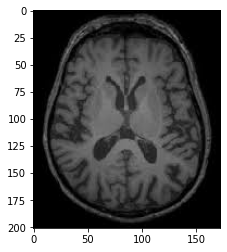

In [59]:
import cv2
import matplotlib.pyplot as plt
test_1=cv2.imread('/content/brain-mri-images-for-brain-tumor-detection/no/10 no.jpg')
plt.imshow(test_1)

In [60]:
test_1.shape

(201, 173, 3)

In [65]:
test_1=cv2.resize(test_1,(128,128))
test_1=test_1.reshape(1,128,128,3)
model.predict(test_1)

1/1 [==============================] - 0s 486ms/step


array([[0.11446214, 0.93886924]], dtype=float32)

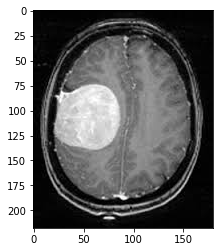

In [73]:
test_2=cv2.imread('/content/brain-mri-images-for-brain-tumor-detection/yes/Y1.jpg')
plt.imshow(test_2)

In [74]:
test_2=cv2.resize(test_2,(128,128))
test_2=test_2.reshape(1,128,128,3)
model.predict(test_2)

1/1 [==============================] - 0s 23ms/step


array([[0.785481  , 0.01559297]], dtype=float32)